In [1]:
import pandas as pd
import numpy as np
import sqlite3 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from pandasql import sqldf

In [2]:
ConnectiontoDF = sqlite3.connect("im.db")
cur_IMDB = ConnectiontoDF.cursor()
cur_IMDB.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
IMBD_tables = cur_IMDB.fetchall()
IMBD_tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [3]:
cur_IMDB.execute("""SELECT * FROM movie_basics;""")
cur_IMDB.fetchall()
Whatisinhere1 = """
SELECT *
FROM movie_basics
;
"""
cur_IMDB.execute(Whatisinhere1).fetchall()
df1 = pd.DataFrame(cur_IMDB.execute(Whatisinhere1).fetchall())
from matplotlib.pyplot import figure

In [4]:
x = df1[4].fillna(value=df1[4].mean(), inplace=True)


In [5]:
x = df1.drop([2], axis=1)
x

,0,1,3,4,5
0,tt0063540,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,2013,86.187247,Comedy
146142,tt9916730,6 Gunn,2017,116.000000,None


In [6]:
type(x)

pandas.core.frame.DataFrame

In [7]:
print(list(x.columns))

[0, 1, 3, 4, 5]


In [8]:
cur_IMDB.execute("""SELECT * FROM movie_ratings;""")
cur_IMDB.fetchall()
Whatisinhere5 = """ SELECT * FROM movie_ratings ;"""
df5 = pd.DataFrame(cur_IMDB.execute(Whatisinhere5).fetchall())
y = df5

In [9]:
z = pd.merge(x, y, on=0)

In [10]:
z.

SyntaxError: invalid syntax (<ipython-input-10-6f059d2fb561>, line 1)

In [11]:
print(list(z.columns))

[0, '1_x', 3, 4, 5, '1_y', 2]


In [12]:
z.rename(columns = {0:"movie_id", "1_x":"title", 3:"year", 4:"runtime", 5:"genres", "1_y":"average_rating" }, inplace = True)

In [13]:
z

,movie_id,title,year,runtime,genres,average_rating,2
0,tt0063540,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.000000,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98.000000,"Drama,Family",8.7,136
73853,tt9914642,Albatross,2017,86.187247,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,2019,86.187247,None,6.6,5


In [14]:
z = z.drop('genres', axis=1).join(z['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres '))

In [15]:
z = z.dropna()

In [16]:
z

,movie_id,title,year,runtime,average_rating,2,genres
0,tt0063540,Sunghursh,2013,175.000000,7.0,77,Action
0,tt0063540,Sunghursh,2013,175.000000,7.0,77,Crime
0,tt0063540,Sunghursh,2013,175.000000,7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,2019,114.000000,7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,2019,114.000000,7.2,43,Drama
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.000000,6.2,6,Documentary
73852,tt9914286,Sokagin Çocuklari,2019,98.000000,8.7,136,Drama
73852,tt9914286,Sokagin Çocuklari,2019,98.000000,8.7,136,Family
73853,tt9914642,Albatross,2017,86.187247,8.5,8,Documentary


In [17]:
z.describe()#describe before .explode

,year,runtime,average_rating,2
count,128490.000000,128490.000000,128490.000000,1.284900e+05
mean,2014.221021,94.394150,6.302146,5.337769e+03
std,2.579176,150.545499,1.457744,3.808942e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.400000,1.600000e+01
50%,2014.000000,90.000000,6.400000,6.600000e+01
75%,2016.000000,103.000000,7.300000,4.290000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [18]:
#a = z["year"].unique()
#print(sorted(a))

In [19]:
z.columns

Index(['movie_id', 'title', 'year', 'runtime', 'average_rating', 2, 'genres '], dtype='object')

In [20]:
a = z["genres "].unique()
a
#check for hidden white spaces https://stackoverflow.com/questions/38134643/data-frame-object-has-no-attribute

array(['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy',
       'Horror', 'Thriller', 'Adventure', 'Animation', 'History',
       'Documentary', 'Mystery', 'Sci-Fi', 'Family', 'Romance', 'War',
       'Music', 'Sport', 'Western', 'Musical', 'News', 'Reality-TV',
       'Game-Show', 'Adult', 'Short'], dtype=object)

In [21]:
print(z["genres "].value_counts())
#one movie came out - look at the saturation of the market (triple counted*)
#TD: explain that each # in each categ != the total number of movies. 

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres , dtype: int64


[]

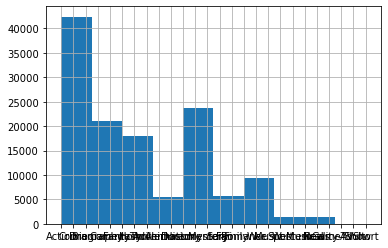

In [22]:
z["genres "].hist().plot(kind= 'bar')

In [23]:
z.groupby(['year']).mean()

,runtime,average_rating,2
year,,,
2010,92.879258,6.233520,6889.097070
2011,93.600790,6.266083,6644.202597
2012,95.792205,6.297982,6258.213784
2013,92.380712,6.296758,6386.046232
2014,93.199592,6.338237,5864.341309
2015,93.488144,6.236390,4584.781359
2016,94.440344,6.285844,4714.284257
2017,95.549118,6.322705,4058.965319
2018,97.281069,6.345429,3621.605634


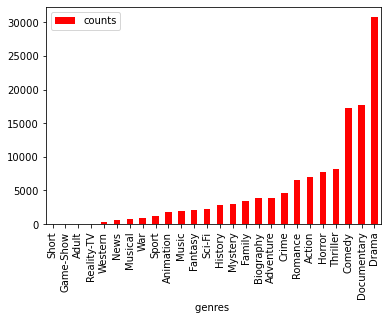

In [24]:
d = z.groupby(["genres "]).count()
d = d.drop(columns=["movie_id", "title", "year", "runtime", 2])
d = d.rename(columns={"average_rating": "counts"})
d.drop_duplicates()
d = d.sort_values(by= ["counts"], ascending = True)
ax = d.plot.bar(color = "red")
#Final_Viewer_Chart = viewer_chart.drop(columns ="movie_id", "title", "year", "runtime")

In [25]:
d

,counts
genres,
Short,1
Game-Show,2
Adult,3
Reality-TV,17
Western,280
News,579
Musical,721
War,853
Sport,1179


In [1]:
d["counts"].plot(kind="barh")
plt.title("Most Heavily Critized Genres of Movies")
plt.ylabel("Type of Genres")
plt.xlabel("Total number of produced films 2010-2019")

plt.show()
#figure_manager = figure(figsize=(400, 400), dpi=90)
#this kills the knerl -> plt.savefig("how.png", bbox_inches="tight")
#how to declutter
#https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

NameError: name 'd' is not defined

In [1]:
#What youre going to say in the presentation- So looking at hte graphs we see that the first one shows an asending order and shows that its double the count- which means people sat down and wrote online and then advised people to watch it. The ratings do not matter because its other variables such as directors and such will have an impact on the production and "gross revenue of the films" and this leads us to our next recommendation 


In [ ]:
z